In [1]:
#import relevant libraries: pip install re, pip install natsort, pip install plotly==5.10.0
import sys
import os
import glob

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import datetime as dt8
import math
import matplotlib.pyplot as plt
import decimal
import re
from natsort import index_natsorted
import dabest
import dabest_jck
import itertools
import NLCLIMB 
import NLGRAPHS
import NLMATH

import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objects import Layout
from scipy.optimize import curve_fit

#NOTE: SUPPRESSES WARNINGS!

import warnings

warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#initial file processing

computer1 = "C:\\Users\\User"
computer2 = "C:\\Users\\lnico"
computer3 = "D:"
filedir = "\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\Falling_New\\"

openPath = computer2 + filedir

# openPath = "C:\\Users\\User\\ACC Lab Dropbox\\ACC Lab\\Zhiyi\\NL's amended data\\Compilation\\"
files = os.listdir(openPath)

#identifying genotypes
responder = "Tub_Tsh_Chrimson2"
driver = "VT999036"
wt = "w1118"
transgenic = driver + " x " + responder
filename = openPath + transgenic + ".csv"
filenamewt = openPath + wt+"_"+ transgenic + ".csv"

print(filename)
print(filenamewt)

dfe=pd.read_csv(filename)
dfw= pd.read_csv(filenamewt)

exptdf = dfe.drop(dfe.columns[[0]],axis = 1)
wtdf = dfw.drop(dfw.columns[[0]],axis = 1)

dfexpt = NLCLIMB.generation(exptdf, driver)
dfwt = NLCLIMB.generation(wtdf, wt)

C:\Users\lnico\ACC Lab Dropbox\ACC Lab\Nicole Lee\Data Compilation\Falling_New\VT999036 x Tub_Tsh_Chrimson2.csv
C:\Users\lnico\ACC Lab Dropbox\ACC Lab\Nicole Lee\Data Compilation\Falling_New\w1118_VT999036 x Tub_Tsh_Chrimson2.csv


In [3]:
def counterfall(df_rr1, nnumber, nnumberwt, phase): #phase is either "wt" or "expt"
    
    df_rr1['integer'] = df_rr1['value'].astype(int)
    count_wtfull = df_rr1[(df_rr1["Type"] == phase)]['integer'].value_counts()
    count_wtfull = count_wtfull.rename_axis('integer').reset_index(name='counts')

    if phase == "WT":
        dvis = nnumberwt
    else:
        dvis = nnumber
    count_wtfull['counts'] = (count_wtfull['counts']/dvis)*100
    
    listofval = [x for x in [float(x) for x in range(0,23)] if x not in set(count_wtfull['integer'])]
    count_wtfull = pd.concat([count_wtfull, pd.DataFrame({"integer" :listofval})], ignore_index = True)

    count_wtfull = count_wtfull.sort_values(by=['integer']).reset_index(drop = True)
    count_wtfull['counts'] = count_wtfull['counts'].replace(np.nan, 0)
    count_wtfull['name'] = phase
    
    return count_wtfull

def removingextraline(df1):
    df = df1.reset_index(drop=True)
    df['Seconds'] = round(df['Seconds'],1)
    line = df[(df['Seconds'] > 22.0)].index
    df = df.drop(line)
    
    return df

# **TOTAL calculations for graphs**



In [4]:
#Y position
df_de = NLMATH.calcgraph(dfexpt,"Y.*")
df_meande=NLMATH.meangraph(df_de)
df_dw = NLMATH.calcgraph(dfwt,"Y.*")
df_meandw=NLMATH.meangraph(df_dw)

#speed
df_se = NLMATH.calcgraph(dfexpt, "Velocity.*")
df_meanse = NLMATH.meangraph(df_se)
df_sw = NLMATH.calcgraph(dfwt, "Velocity.*")
df_meansw = NLMATH.meangraph(df_sw)

#Falling
df_fed = NLMATH.fallcalc(dfexpt, "Dark")
df_fel = NLMATH.fallcalc(dfexpt, "Full")
df_fer = NLMATH.fallcalc(dfexpt, "Recovery")

df_fwd = NLMATH.fallcalc(dfwt, "Dark")
df_fwl = NLMATH.fallcalc(dfwt, "Full")
df_fwr = NLMATH.fallcalc(dfwt, "Recovery")

#Falling
df_re = NLMATH.rastergraph(dfexpt)
df_rw = NLMATH.rastergraph(dfwt)
df_re['Type'] = "EXPT"
df_rw['Type'] = "WT"

df_rrdark = pd.concat([df_re[(df_re['ExperimentState']== 'Dark')], df_rw[(df_rw['ExperimentState']== 'Dark')]]).reset_index(drop=True)
#df_rr['list']= range(1,len(df_rr)+1)
df_rrfull = pd.concat([df_re[(df_re['ExperimentState']== 'Full')], df_rw[(df_rw['ExperimentState']== 'Full')]]).reset_index(drop=True)
#df_rr1['list']= range(1,len(df_rr1)+1)
df_rrrec = pd.concat([df_re[(df_re['ExperimentState']== 'Recovery')], df_rw[(df_rw['ExperimentState']== 'Recovery')]]).reset_index(drop=True)

##  plotly version

In [19]:
df3 = removingextraline(df_meande)
df4 = removingextraline(df_meandw)
df5 = removingextraline(df_meanse)
df6 = removingextraline(df_meansw)
driver = transgenic

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objects import Layout

fig = make_subplots(rows=4, cols=2, row_heights=[0.1, 0.3,0.3, 0.3],shared_yaxes=True, shared_xaxes=True,vertical_spacing=0.05, horizontal_spacing = 0.05) #, subplot_titles=("Dark phase", "Light phase", "", " ")

row1 = 2
row2 = 3
row3 = 4

if responder == "ACR":
    barcolr = "#18c91b"
    SDinner = "rgba(86, 218, 90, 0.3)"
if responder == "Chrimson2":
    barcolr = "#DC143C"
    SDinner = "rgba(220, 20, 60, 0.3)"

#basic cartoon
fig.add_trace(go.Scatter(x=[], y=[]),row=1, col=1)
fig.add_shape(type="rect",x0=0, y0=0, x1=0.5, y1=1,line=dict(color="black",width=1.5,),fillcolor="gold",row=1,col=1)
fig.add_shape(type="rect",x0=0.5, y0=0, x1=3, y1=1,line=dict(color="black",width=1.5,),fillcolor="black",row=1,col=1)
fig.add_shape(type="rect",x0=3, y0=0, x1=23, y1=1,line=dict(color="black",width=1.5,),fillcolor="#808080",row=1,col=1)

fig.add_trace(go.Scatter(x=[], y=[]),row=1, col=2)
fig.add_shape(type="rect",x0=0, y0=0, x1=0.5, y1=1,line=dict(color="black",width=1.5,),fillcolor="gold",row=1,col=2)
fig.add_shape(type="rect",x0=0.5, y0=0, x1=3, y1=1,line=dict(color="black",width=1.5,),fillcolor="black",row=1,col=2)
fig.add_shape(type="rect",x0=3, y0=0, x1=23, y1=1,line=dict(color="black",width=1.5,),fillcolor=barcolr,row=1,col=2)

fig.update_xaxes(showgrid=False,zeroline=False,ticks="",showline=False,showticklabels=False,range=[-2.05,1],row=1, col=1)
fig.update_yaxes(showgrid=False,zeroline=False,ticks="",showline=False,showticklabels=False,range=[-0.05,2.1],row=1, col=1)
fig.update_xaxes(showgrid=False,zeroline=False,ticks="",showline=False,showticklabels=False,range=[-2.05,1],row=1, col=2)
fig.update_yaxes(showgrid=False,zeroline=False,ticks="",showline=False,showticklabels=False,range=[-0.05,2.4],row=1, col=2)


lightcolor = barcolr
opacitylevel = 0.5

nnumber = int(0.25*(len(dfexpt.columns)-2))
nnumberwt = int(0.25*(len(dfwt.columns)-2))

time = df3.loc[df3.ExperimentState == "Dark", 'Seconds']
time2 = df4.loc[df4.ExperimentState == "Dark", 'Seconds']

#exptdark
fig.append_trace(go.Scattergl(
        x =time,
        y=df3.loc[df3.ExperimentState == "Dark", 'mean'],
        mode='lines',
        name='Mean of Y position(mm)_Expt',
        marker = dict(color = lightcolor),
        line=dict(width=2),                                           
        showlegend=False   
    ), row=row1, col=1)

#expt_light
fig.append_trace(go.Scattergl(
        x =time,
        y=df3.loc[df3.ExperimentState == "Full", 'mean'],
        mode='lines',
        name='Mean of Y position(mm)_Expt',
        marker = dict(color = lightcolor),
        line=dict(width=2),
        showlegend=False    
    ), row=row1, col=2)

#exptdark_CI
fig.append_trace(go.Scatter(
        name='Upper Bound',
        x=time,
        y=df3.loc[df3.ExperimentState == "Dark", 'mean']+df3.loc[df3.ExperimentState == "Dark", 'CI'],
        mode='lines',
        marker=dict(color= lightcolor),
        line=dict(width=0),
        showlegend=False
    ), row=row1, col=1)
fig.append_trace(go.Scatter(
        name=transgenic,
        x=time,
        y=df3.loc[df3.ExperimentState == "Dark", 'mean']-df3.loc[df3.ExperimentState == "Dark", 'CI'],
        marker=dict(color= lightcolor),
        line=dict(width=0),
        mode='lines',
        fillcolor= SDinner,
        fill='tonexty',
        showlegend=False
    ), row=row1, col=1)

#exptlight_CI
fig.append_trace(go.Scatter(
        name='Upper Bound',
        x=time,
        y=df3.loc[df3.ExperimentState == "Full", 'mean']+df3.loc[df3.ExperimentState == "Full", 'CI'],
        mode='lines',
        marker=dict(color=SDinner),
        line=dict(width=0),
        showlegend=False
    ), row=row1, col=2)
fig.append_trace(go.Scatter(
        name='Lower Bound',
        x=time,
        y=df3.loc[df3.ExperimentState == "Full", 'mean']-df3.loc[df3.ExperimentState == "Full", 'CI'],
        marker=dict(color=SDinner),
        line=dict(width=0),
        mode='lines',
        fillcolor=SDinner,
        fill='tonexty',
        showlegend=False
    ), row=row1, col=2)

#wt dark mean
fig.append_trace(go.Scattergl(
        x =time2,
        y=df4.loc[df4.ExperimentState == "Dark", 'mean'],
        mode='lines',
        name='WT',
        marker = dict(color = "#000"),
        line=dict(width=2),
        showlegend=False                              
    ), row=row1, col=1)

#wt light mean
fig.append_trace(go.Scattergl(
        x =time2,
        y=df4.loc[df4.ExperimentState == "Full", 'mean'],
        mode='lines',
        name='Mean of Y position(mm)_WT',
        marker = dict(color = "#000"),
        line=dict(width=2),
        showlegend=False        
    ), row=row1, col=2)

#wtdarkCI
fig.append_trace(go.Scatter(
        name='Upper Bound',
        x=time2,
        y=df4.loc[df4.ExperimentState == "Dark", 'mean']+df4.loc[df4.ExperimentState == "Dark", 'CI'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        opacity = opacitylevel,
        showlegend=False
    ), row=row1, col=1)
fig.append_trace(go.Scatter(
        name='Lower Bound',
        x=time2,
        y=df4.loc[df4.ExperimentState == "Dark", 'mean']-df4.loc[df4.ExperimentState == "Dark", 'CI'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    ), row=row1, col=1)

#wtlightCI
fig.append_trace(go.Scatter(
        name='Upper Bound',
        x=time2,
        y=df4.loc[df4.ExperimentState == "Full", 'mean']+df4.loc[df4.ExperimentState == "Dark", 'CI'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        opacity = opacitylevel,
        showlegend=False
    ), row=row1, col=2)

fig.append_trace(go.Scatter(
        name='Lower Bound',
        x=time2,
        y=df4.loc[df4.ExperimentState == "Full", 'mean']-df4.loc[df4.ExperimentState == "Dark", 'CI'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    ), row=row1, col=2)


#speed


time = df5.loc[df5.ExperimentState == "Dark", 'Seconds']
time2 = df6.loc[df6.ExperimentState == "Dark", 'Seconds']

#exptdark
fig.append_trace(go.Scattergl(
        x =time,
        y=df5.loc[df5.ExperimentState == "Dark", 'mean'],
        mode='lines',
        name='Mean speed (mm/s)_Expt',
        marker = dict(color = lightcolor),
        line=dict(width=2),
        showlegend=False    
    ), row=row2, col=1)

fig.append_trace(go.Scatter(
        name='Upper Bound',
        x=time,
        y=df5.loc[df5.ExperimentState == "Dark", 'mean']+df5.loc[df5.ExperimentState == "Dark", 'CI'],
        mode='lines',
        marker=dict(color= SDinner),
        line=dict(width=0),
        showlegend=False
    ), row=row2, col=1)
fig.append_trace(go.Scatter(
        name='Lower Bound',
        x=df5['Seconds'],
        y=df5.loc[df5.ExperimentState == "Dark", 'mean']-df5.loc[df5.ExperimentState == "Dark", 'CI'],
        marker=dict(color=SDinner),
        line=dict(width=0),
        mode='lines',
        fillcolor=SDinner,
        fill='tonexty',
        showlegend=False
    ), row=row2, col=1)

#exptlight
fig.append_trace(go.Scattergl(
        x =time,
        y=df5.loc[df5.ExperimentState == "Full", 'mean'],
        mode='lines',
        name='Mean speed (mm/s)_Expt',
        marker = dict(color = lightcolor),
        line=dict(width=2),
        showlegend=False    
    ), row=row2, col=2)

fig.append_trace(go.Scatter(
        name='Upper Bound',
        x=time,
        y=df5.loc[df5.ExperimentState == "Full", 'mean']+df5.loc[df5.ExperimentState == "Full", 'CI'],
        mode='lines',
        marker=dict(color = SDinner),
        line=dict(width=0),
        showlegend=False
    ), row=row2, col=2)

fig.append_trace(go.Scatter(
        name='Lower Bound',
        x=time,
        y=df5.loc[df5.ExperimentState == "Full", 'mean']-df5.loc[df5.ExperimentState == "Full", 'CI'],
        marker=dict(color = SDinner),
        line=dict(width=0),
        mode='lines',
        fillcolor=SDinner,
        fill='tonexty',
        showlegend=False
    ), row=row2, col=2)


#wtdark
fig.append_trace(go.Scattergl(
        x =time2,
        y=df6.loc[df6.ExperimentState == "Dark", 'mean'],
        mode='lines',
        name='Mean speed (mm/s)_WT',
        marker = dict(color = "#000"),
        line=dict(width=2),
        showlegend=False    
    ), row=row2, col=1)

fig.append_trace(go.Scatter(
        name='Upper Bound',
        x=time2,
        y=df6.loc[df6.ExperimentState == "Dark", 'mean']+df6.loc[df6.ExperimentState == "Dark", 'CI'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        opacity = opacitylevel,
        showlegend=False
    ), row=row2, col=1)

fig.append_trace(go.Scatter(
        name='Lower Bound',
        x=time2,
        y=df6.loc[df6.ExperimentState == "Dark", 'mean']-df6.loc[df6.ExperimentState == "Dark", 'CI'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    ), row=row2, col=1)

#wtlight
fig.append_trace(go.Scattergl(
        x =time2,
        y=df6.loc[df6.ExperimentState == "Full", 'mean'],
        mode='lines',
        name='Mean speed (mm/s)_WT',
        marker = dict(color = "#000"),
        line=dict(width=2),
        showlegend=False   
    ), row=row2, col=2)

fig.append_trace(go.Scatter(
        name='Upper Bound',
        x=time2,
        y=df6.loc[df6.ExperimentState == "Full", 'mean']+df6.loc[df6.ExperimentState == "Full", 'CI'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        opacity = opacitylevel,
        showlegend=False
    ), row=row2, col=2)

fig.append_trace(go.Scatter(
        name='Lower Bound',
        x=time2,
        y=df6.loc[df6.ExperimentState == "Full", 'mean']-df6.loc[df6.ExperimentState == "Full", 'CI'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    ), row=row2, col=2)


#raster
count_wtfull = counterfall(df_rrfull, nnumber, nnumberwt, "WT")
count_exptdark = counterfall(df_rrdark, nnumber, nnumberwt, "EXPT")
count_wtdark = counterfall(df_rrdark, nnumber, nnumberwt, "WT")
count_exptfull = counterfall(df_rrfull, nnumber, nnumberwt, "EXPT")

fig.append_trace(go.Scatter(
        name='WT',
        x=count_wtdark['integer'],
        y=count_wtdark['counts'],
        marker=dict(color="#444"),
        line=dict(width=2),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.1)',
        fill='tozeroy', showlegend=False
    ), row=row3, col=1)

fig.append_trace(go.Scatter(
        name='EXPT',
        x=count_exptdark['integer'],
        y=count_exptdark['counts'],
        marker=dict(color=lightcolor),
        line=dict(width=2),
        mode='lines',
        fillcolor=SDinner,
        fill='tozeroy', showlegend=False
    ), row=row3, col=1)

fig.append_trace(go.Scatter(
        name="w1118 controls",
        x=count_wtfull['integer'],
        y=count_wtfull['counts'],
        marker=dict(color="#444"),
        line=dict(width=2),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.1)',
        fill='tozeroy', showlegend=True
    ), row=row3, col=2)

fig.append_trace(go.Scatter(
        name=transgenic,
        x=count_exptfull['integer'],
        y=count_exptfull['counts'],
        opacity = 0.5,
        marker=dict(color=lightcolor),
        line=dict(width=2),
        mode='lines',
        fillcolor=SDinner,
        fill='tozeroy', showlegend=True
    ), row=row3, col=2)


#row2
fig.add_shape(type="line",x0=3, y0=0, x1=3, y1=90,line=dict(color="black",width=3,dash = "dot"),fillcolor="black", row=row1,col=1)
fig.add_shape(type="line",x0=3, y0=0, x1=3, y1=90,line=dict(color="black",width=3,dash = "dot"),fillcolor="black", row=row1,col=2)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor = "gainsboro", range=[0,90],row=row1,col=2)
fig.update_yaxes(title='Mean of' +'<br>' + '<b>' + 'Y position (mm)' + '</b>',title_font=dict(size=15), gridcolor = "gainsboro", range=[0,90],tickvals=np.arange(0,91,20),showline=True, linewidth=2, linecolor='black', row=row1,col=1)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor = "gainsboro", row=row1,col=1)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor = "gainsboro", row=row1,col=2)

#row3
fig.add_shape(type="line",x0=3, y0=0, x1=3, y1=100,line=dict(color="black",width=3,dash = "dot"),fillcolor="black", row=row2,col=1)
fig.add_shape(type="line",x0=3, y0=0, x1=3, y1=100,line=dict(color="black",width=3,dash = "dot"),fillcolor="black", row=row2,col=2)
fig.update_yaxes(gridcolor = "gainsboro",title='Mean of ' +'<br>' + '<b>' +'Speed (mm/s)'+ '</b>',title_font=dict(size=15),range=[0,40],tickvals=np.arange(0,41,10),showline=True, linewidth=2, linecolor='black', row=row2,col=1)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black',range=[0,40],gridcolor = "gainsboro",tickvals=np.arange(0,41,10),row=row2,col=2)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black',gridcolor = "gainsboro", row=row2,col=1)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor = "gainsboro",row=row2,col=2)

#row4
fig.add_shape(type="line",x0=3, y0=0, x1=3, y1=300,line=dict(color="black",width=3,dash = "dot"),fillcolor="black", row=row3,col=1)
fig.add_shape(type="line",x0=3, y0=0, x1=3, y1=300,line=dict(color="black",width=3,dash = "dot"),fillcolor="black", row=row3,col=2)
fig.update_yaxes(gridcolor = "gainsboro",title='# of '+ '<b>' + 'Falls'+ '</b>',title_font=dict(family="helvetica",size=17), range=[0,15],tickvals=np.arange(0,16,5),showline=True, linewidth=2, linecolor='black',row=row3,col=1)
fig.update_yaxes(showline=True,gridcolor = "gainsboro", linewidth=2, linecolor='black',range=[0,15],tickvals=np.arange(0,16,5),row=row3,col=2)

fig.update_xaxes(title='Seconds(s)',title_font=dict(size = 15), range=[0,23],tickvals=np.arange(0,24,5),showline=True, gridcolor = "gainsboro",linewidth=2, linecolor='black', row=row3,col=1)
fig.update_xaxes(title='Seconds(s)', title_font=dict(size = 15), range=[0,23],tickvals=np.arange(0,24,5),showline=True, gridcolor = "gainsboro",linewidth=2, linecolor='black', row=row3,col=2)


fig.update_layout(title = '<b>' + driver + '</b>' + " (n= " + str(nnumber) + ")", title_font=dict(family="helvetica", size = 20), font = dict(family = "helvetica"), height=600, width=900, hovermode='x unified', showlegend=True, plot_bgcolor='rgba(0,0,0,0)')
fig.update_annotations(font=dict(family="helvetica", size = 17))

#legend
fig.update_layout(showlegend=True, legend=dict(
    title_font_family='helvetica',
    font=dict(
        size=12
    )
))
fig.update_layout(legend= {'itemsizing': 'constant'})

fig.show()

In [ ]:
df3 = removingextraline(df_meande)
df4 = removingextraline(df_meandw)
df5 = removingextraline(df_meanse)
df6 = removingextraline(df_meansw)

driver = transgenic

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objects import Layout

fig = make_subplots(rows=4, cols=1, row_heights=[0.1, 0.3,0.3, 0.3],shared_yaxes=True, shared_xaxes=True,horizontal_spacing = 0.05) #, subplot_titles=("Dark phase", "Light phase", "", " ")

row1 = 2
row2 = 3
row3 = 4

if responder == "ACR":
    barcolr = "#00ff00"
if responder == "Chrimson2":
    barcolr = "#DC143C"

#basic cartoon
fig.add_trace(go.Scatter(x=[], y=[]),row=1, col=1)
fig.add_shape(type="rect",x0=0, y0=0, x1=0.5, y1=1,line=dict(color="black",width=1.5,),fillcolor="gold",row=1,col=1)
fig.add_shape(type="rect",x0=0.5, y0=0, x1=3, y1=1,line=dict(color="black",width=1.5,),fillcolor="black",row=1,col=1)
fig.add_shape(type="rect",x0=3, y0=0, x1=23, y1=1,line=dict(color="black",width=1.5,),fillcolor=barcolr,row=1,col=1)

fig.update_xaxes(showgrid=False,zeroline=False,ticks="",showline=False,showticklabels=False,range=[-2.05,1],row=1, col=1)
fig.update_yaxes(showgrid=False,zeroline=False,ticks="",showline=False,showticklabels=False,range=[-0.05,2.1],row=1, col=1)

darkcolor  = "#000000"
lightcolor = barcolr
SDcolor = " #cce6ff"
SDinner = "rgba(179, 217, 255,0.3)"

nnumber = int(0.25*(len(dfexpt.columns)-2))
nnumberwt = int(0.25*(len(dfwt.columns)-2))

time = df3.loc[df3.ExperimentState == "Dark", 'Seconds']
time2 = df4.loc[df4.ExperimentState == "Dark", 'Seconds']

fig.append_trace(go.Scattergl(x =time,
        y=df3.loc[df3.ExperimentState == "Dark", 'mean'],
        mode='lines',
        name='Mean of Y position(mm)_Expt',
        marker = dict(color = darkcolor),
        line=dict(width=2),                                           
        showlegend=False   
    ), row=row1, col=1)

#expt_light
fig.append_trace(go.Scattergl(x =time,
        y=df3.loc[df3.ExperimentState == "Full", 'mean'],
        mode='lines',
        name='Mean of Y position(mm)_Expt',
        marker = dict(color = lightcolor),
        line=dict(width=2),
        showlegend=False    
    ), row=row1, col=1)

#exptdark_CI
fig.append_trace(go.Scatter(
        name='Upper Bound',
        x=time,
        y=df3.loc[df3.ExperimentState == "Dark", 'mean']+df3.loc[df3.ExperimentState == "Dark", 'CI'],
        mode='lines',
        marker=dict(color= darkcolor),
        line=dict(width=0),
        showlegend=False
    ), row=row1, col=1)
fig.append_trace(go.Scatter(
        name=transgenic,
        x=time,
        y=df3.loc[df3.ExperimentState == "Dark", 'mean']-df3.loc[df3.ExperimentState == "Dark", 'CI'],
        marker=dict(color= darkcolor),
        line=dict(width=0),
        mode='lines',
        fillcolor= SDinner,
        fill='tonexty',
        showlegend=False
    ), row=row1, col=1)

#exptlight_CI
fig.append_trace(go.Scatter(
        name='Upper Bound',
        x=time,
        y=df3.loc[df3.ExperimentState == "Full", 'mean']+df3.loc[df3.ExperimentState == "Full", 'CI'],
        mode='lines',
        marker=dict(color=SDcolor),
        line=dict(width=0),
        showlegend=False
    ), row=row1, col=1)
fig.append_trace(go.Scatter(
        name='Lower Bound',
        x=time,
        y=df3.loc[df3.ExperimentState == "Full", 'mean']-df3.loc[df3.ExperimentState == "Full", 'CI'],
        marker=dict(color=SDcolor),
        line=dict(width=0),
        mode='lines',
        fillcolor=SDinner,
        fill='tonexty',
        showlegend=False
    ), row=row1, col=1)

#speed


time = df5.loc[df5.ExperimentState == "Dark", 'Seconds']
time2 = df6.loc[df6.ExperimentState == "Dark", 'Seconds']
#exptdark
fig.append_trace(go.Scattergl(x =time,
        y=df5.loc[df5.ExperimentState == "Dark", 'mean'],
        mode='lines',
        name='Mean speed (mm/s)_Expt',
        marker = dict(color = darkcolor),
        line=dict(width=2),
        showlegend=False    
    ), row=row2, col=1)

fig.append_trace(go.Scatter(
        name='Upper Bound',
        x=time,
        y=df5.loc[df5.ExperimentState == "Dark", 'mean']+df5.loc[df5.ExperimentState == "Dark", 'CI'],
        mode='lines',
        marker=dict(color= darkcolor),
        line=dict(width=0),
        showlegend=False
    ), row=row2, col=1)
fig.append_trace(go.Scatter(
        name='Lower Bound',
        x=df5['Seconds'],
        y=df5.loc[df5.ExperimentState == "Dark", 'mean']-df5.loc[df5.ExperimentState == "Dark", 'CI'],
        marker=dict(color=darkcolor),
        line=dict(width=0),
        mode='lines',
        fillcolor=SDinner,
        fill='tonexty',
        showlegend=False
    ), row=row2, col=1)

#exptlight
fig.append_trace(go.Scattergl(x =time,
        y=df5.loc[df5.ExperimentState == "Full", 'mean'],
        mode='lines',
        name='Mean speed (mm/s)_Expt',
        marker = dict(color = lightcolor),
        line=dict(width=2),
        showlegend=False    
    ), row=row2, col=1)

fig.append_trace(go.Scatter(
        name='Upper Bound',
        x=time,
        y=df5.loc[df5.ExperimentState == "Full", 'mean']+df5.loc[df5.ExperimentState == "Full", 'CI'],
        mode='lines',
        marker=dict(color = SDcolor),
        line=dict(width=0),
        showlegend=False
    ), row=row2, col=1)

fig.append_trace(go.Scatter(
        name='Lower Bound',
        x=time,
        y=df5.loc[df5.ExperimentState == "Full", 'mean']-df5.loc[df5.ExperimentState == "Full", 'CI'],
        marker=dict(color = SDcolor),
        line=dict(width=0),
        mode='lines',
        fillcolor=SDinner,
        fill='tonexty',
        showlegend=False
    ), row=row2, col=1)


#raster
count_exptdark = counterfall(df_rrdark, nnumber, nnumberwt, "EXPT")
count_exptfull = counterfall(df_rrfull, nnumber, nnumberwt, "EXPT")

fig.append_trace(go.Scatter(
        name='EXPT',
        x=count_exptdark['value'],
        y=count_exptdark['counts'],
        marker=dict(color=darkcolor),
        line=dict(width=2),
        mode='lines',
        fillcolor=SDinner,
        fill='tozeroy', showlegend=False
    ), row=row3, col=1)

fig.append_trace(go.Scatter(
        name=transgenic,
        x=count_exptfull['value'],
        y=count_exptfull['counts'],
        marker=dict(color=lightcolor),
        line=dict(width=2),
        mode='lines',
        fillcolor=SDinner,
        fill='tozeroy', showlegend=True
    ), row=row3, col=1)


#row2
fig.add_shape(type="line",x0=3, y0=0, x1=3, y1=90,line=dict(color="black",width=3,dash = "dot"),fillcolor="black", row=row1,col=1)

fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor = "gainsboro", range=[0,90],row=row1,col=1)
fig.update_yaxes(title='Mean of' +'<br>' + '<b>' + 'Y position (mm)' + '</b>',title_font=dict(size=15), gridcolor = "gainsboro", range=[0,90],tickvals=np.arange(0,91,20),showline=True, linewidth=2, linecolor='black', row=row1,col=1)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor = "gainsboro", row=row1,col=1)


#row3
fig.add_shape(type="line",x0=3, y0=0, x1=3, y1=100,line=dict(color="black",width=3,dash = "dot"),fillcolor="black", row=row2,col=1)

fig.update_yaxes(gridcolor = "gainsboro",title='Mean of ' +'<br>' + '<b>' +'Speed (mm/s)'+ '</b>',title_font=dict(size=15),range=[0,40],tickvals=np.arange(0,41,10),showline=True, linewidth=2, linecolor='black', row=row2,col=1)
# fig.update_yaxes(showline=True, linewidth=2, linecolor='black',range=[0,40],gridcolor = "gainsboro",tickvals=np.arange(0,41,10),row=row2,col=2)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black',gridcolor = "gainsboro", row=row2,col=1)

#row4
fig.add_shape(type="line",x0=3, y0=0, x1=3, y1=300,line=dict(color="black",width=3,dash = "dot"),fillcolor="black", row=row3,col=1)
fig.update_yaxes(gridcolor = "gainsboro",title='# of '+ '<b>' + 'Falls'+ '</b>',title_font=dict(family="helvetica",size=17), range=[0,15],tickvals=np.arange(0,16,5),showline=True, linewidth=2, linecolor='black',row=row3,col=1)
fig.update_xaxes(title='Seconds(s)',title_font=dict(size = 15), range=[0,23],tickvals=np.arange(0,24,5),showline=True, gridcolor = "gainsboro",linewidth=2, linecolor='black', row=row3,col=1)
fig.update_layout(title = '<b>' + driver + '</b>' + " (n= " + str(nnumber) + ")", title_font=dict(family="helvetica", size = 20), font = dict(family = "helvetica"), height=600, width=600, hovermode='x unified', showlegend=True, plot_bgcolor='rgba(0,0,0,0)')
fig.update_annotations(font=dict(family="helvetica", size = 17))

#legend
fig.update_layout(showlegend=False, legend=dict(
    title_font_family='helvetica',
    font=dict(
        size=12
    )
))
fig.update_layout(legend= {'itemsizing': 'constant'})

fig.show()

## matplotlib version

C:\Users\lnico\AppData\Local\Temp\ipykernel_9460\3782596400.py:131: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figfirstplot.show()


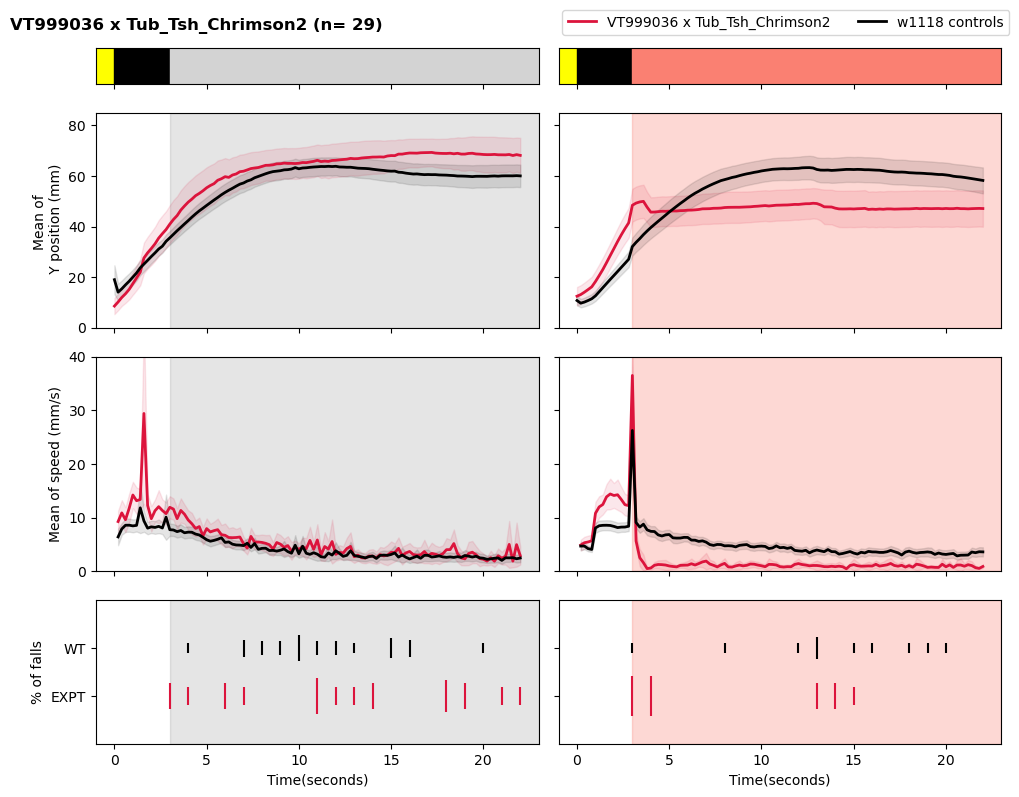

In [6]:

import matplotlib.patches as patches
figfirstplot, axs = plt.subplots(4, 2, figsize=(10, 8),sharex = "col", sharey='row', gridspec_kw={'height_ratios': [1,6,6,4]})


df3 = removingextraline(df_meande)
df4 = removingextraline(df_meandw)
df5 = removingextraline(df_meanse)
df6 = removingextraline(df_meansw)
driver = transgenic
nnumber = int(0.20*(len(dfexpt.columns)-2))
nnumberwt = int(0.20*(len(dfwt.columns)-2))
time = df3.loc[df3.ExperimentState == "Dark", 'Seconds']
time2 = df4.loc[df4.ExperimentState == "Dark", 'Seconds']


if "ACR" in responder:
    barcolr = "#b5651d"
    patchcolor = "#c5e384"
if "Chrimson2" in responder:
    barcolr = "#DC143C"
    patchcolor = "salmon"

#df3 = expt
#df4 = wt

#cartoon
axs[0,0].axvspan(-1,0, color = "#FFFF00", label = "_nolegend_")
axs[0,0].axvspan(0,3, color = "#000000", label = "_nolegend_")
axs[0,0].axvspan(3,23, color = "lightgray" , label = "_nolegend_")

axs[0,1].axvspan(-1,0, color = "#FFFF00" , label = "_nolegend_")
axs[0,1].axvspan(0,3, color = "#000000", label = "_nolegend_")
axs[0,1].axvspan(3,23, color = patchcolor, label = "_nolegend_")

axs[0,0].get_yaxis().set_visible(False)
axs[0,1].get_yaxis().set_visible(False)

#y pos    

axs[1,0].axvspan(3,23, alpha=0.1, color = "#000000", label = "_nolegend_")

axs[1,0].plot(time, df3.loc[df3.ExperimentState == "Dark", 'mean'], color = barcolr, linewidth = 2, label = "driver")
axs[1,0].fill_between(time, (df3.loc[df3.ExperimentState == "Dark", 'mean']-df3.loc[df3.ExperimentState == "Dark", 'CI']), 
                      df3.loc[df3.ExperimentState == "Dark", 'mean']+df3.loc[df3.ExperimentState == "Dark", 'CI'], color= barcolr, alpha=.1, label = "_nolegend_")
axs[1, 0].plot(time, df4.loc[df4.ExperimentState == "Dark", 'mean'], color = "#000000", linewidth =2, label = "w1118 controls")
axs[1,0].fill_between(time, (df4.loc[df4.ExperimentState == "Dark", 'mean']-df4.loc[df4.ExperimentState == "Dark", 'CI']), 
                      df4.loc[df4.ExperimentState == "Dark", 'mean']+df4.loc[df4.ExperimentState == "Dark", 'CI'], color= "#000000", alpha=.1, label = "_nolegend_")
axs[1,0].set(xlabel='Time(seconds)', ylabel='Mean of \n Y position (mm)')
axs[1,1].set(xlabel='Time(seconds)')


axs[1,1].axvspan(3,23, alpha=0.3, color = patchcolor)

axs[1,1].plot(time, df3.loc[df3.ExperimentState == "Full", 'mean'], color = barcolr, linewidth = 2)
axs[1,1].fill_between(time, (df3.loc[df3.ExperimentState == "Full", 'mean']-df3.loc[df3.ExperimentState == "Full", 'CI']), 
                      df3.loc[df3.ExperimentState == "Full", 'mean']+df3.loc[df3.ExperimentState == "Full", 'CI'], color= barcolr, alpha=.1)
axs[1,1].plot(time, df4.loc[df4.ExperimentState == "Full", 'mean'], color = "#000000", linewidth =2)
axs[1,1].fill_between(time, (df4.loc[df4.ExperimentState == "Full", 'mean']-df4.loc[df4.ExperimentState == "Full", 'CI']), 
                      df4.loc[df4.ExperimentState == "Full", 'mean']+df4.loc[df4.ExperimentState == "Full", 'CI'], color= "#000000", alpha=.1)
axs[1,0].set_ylim([0, 85])
axs[1,1].set_ylim([0, 85])


#speed
time = df5.loc[df5.ExperimentState == "Dark", 'Seconds']
time2 = df6.loc[df6.ExperimentState == "Dark", 'Seconds']

axs[2,0].axvspan(3,23, alpha=0.1, color = "#000000")
axs[2,1].axvspan(3,23, alpha=0.3, color = patchcolor)

axs[2,0].plot(time, df5.loc[df5.ExperimentState == "Dark", 'mean'], color = barcolr, linewidth = 2, label = driver)
axs[2,0].fill_between(time, (df5.loc[df5.ExperimentState == "Dark", 'mean']-df5.loc[df5.ExperimentState == "Dark", 'CI']), 
                      df5.loc[df5.ExperimentState == "Dark", 'mean']+df5.loc[df5.ExperimentState == "Dark", 'CI'], color= barcolr, alpha=.1,  label = "_nolegend_")
axs[2,0].plot(time, df6.loc[df6.ExperimentState == "Dark", 'mean'], color = "#000000", linewidth =2, label = "w1118 controls")
axs[2,0].fill_between(time, (df6.loc[df6.ExperimentState == "Dark", 'mean']-df6.loc[df6.ExperimentState == "Dark", 'CI']), 
                      df6.loc[df6.ExperimentState == "Dark", 'mean']+df6.loc[df6.ExperimentState == "Dark", 'CI'], color= "#000000", alpha=.1, label = "_nolegend_")
axs[2,0].set(xlabel='Time(seconds)', ylabel='Mean of speed (mm/s)')
axs[2,1].set(xlabel='Time(seconds)')



axs[2,1].plot(time, df5.loc[df5.ExperimentState == "Full", 'mean'], color = barcolr, linewidth = 2)
axs[2,1].fill_between(time, (df5.loc[df5.ExperimentState == "Full", 'mean']-df5.loc[df5.ExperimentState == "Full", 'CI']), 
                      df5.loc[df5.ExperimentState == "Full", 'mean']+df5.loc[df5.ExperimentState == "Full", 'CI'], color= barcolr, alpha=.1)
axs[2,1].plot(time, df6.loc[df6.ExperimentState == "Full", 'mean'], color = "#000000", linewidth =2)
axs[2,1].fill_between(time, (df6.loc[df6.ExperimentState == "Full", 'mean']-df6.loc[df6.ExperimentState == "Full", 'CI']), 
                      df6.loc[df6.ExperimentState == "Full", 'mean']+df6.loc[df6.ExperimentState == "Full", 'CI'], color= "#000000", alpha=.1)
axs[2,0].set_ylim([0, 40])
axs[2,1].set_ylim([0, 40])


#raster
count_wtfull = counterfall(df_rrfull, nnumber, nnumberwt, "WT")
count_exptdark = counterfall(df_rrdark, nnumber, nnumberwt, "EXPT")
count_wtdark = counterfall(df_rrdark, nnumber, nnumberwt, "WT")
count_exptfull = counterfall(df_rrfull, nnumber, nnumberwt, "EXPT")

axs[3,0].axvspan(3,23, alpha=0.1, color = "#000000")
axs[3,1].axvspan(3,23, alpha=0.3, color = patchcolor)

axs[3,0].scatter(count_exptdark['integer'], y= count_exptdark['name'], s = (50*count_exptdark['counts']), marker = "|", color = barcolr)
axs[3,0].scatter(count_wtdark['integer'], y= count_wtdark['name'], s = (50*count_wtdark['counts']),  marker = "|",color = "#000000")

axs[3,1].scatter(count_exptfull['integer'], y= count_exptfull['name'], s = (50*count_exptfull['counts']), marker = "|", color = barcolr)
axs[3,1].scatter(count_wtfull['integer'], y= count_wtfull['name'], s = (50*count_wtfull['counts']), marker = "|", color = "#000000")

axs[3,0].set(xlabel='Time(seconds)', ylabel='% of falls')
axs[3,1].set(xlabel='Time(seconds)')


axs[3,1].set_ylim([-1,2])



#Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xlim([-1,23])
    
figfirstplot.suptitle(t = driver  + " (n= " + str(nnumber) + ")", fontweight='bold', x = 0.18)

#legend
# labels = [" ", " ", "c", "b"]
# figfirstplot.legend(labels, loc='lower right', bbox_to_anchor=(1,0.95), ncol=len(labels), bbox_transform=figfirstplot.transFigure)
labels = [driver, "w1118 controls"]

figfirstplot.legend(labels, loc='lower right', bbox_to_anchor=(1,0.95), ncol=len(labels), bbox_transform=figfirstplot.transFigure)

figfirstplot.tight_layout()

figfirstplot.show()

C:\Users\lnico\AppData\Local\Temp\ipykernel_9460\3215165668.py:179: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figfirstplot.show()


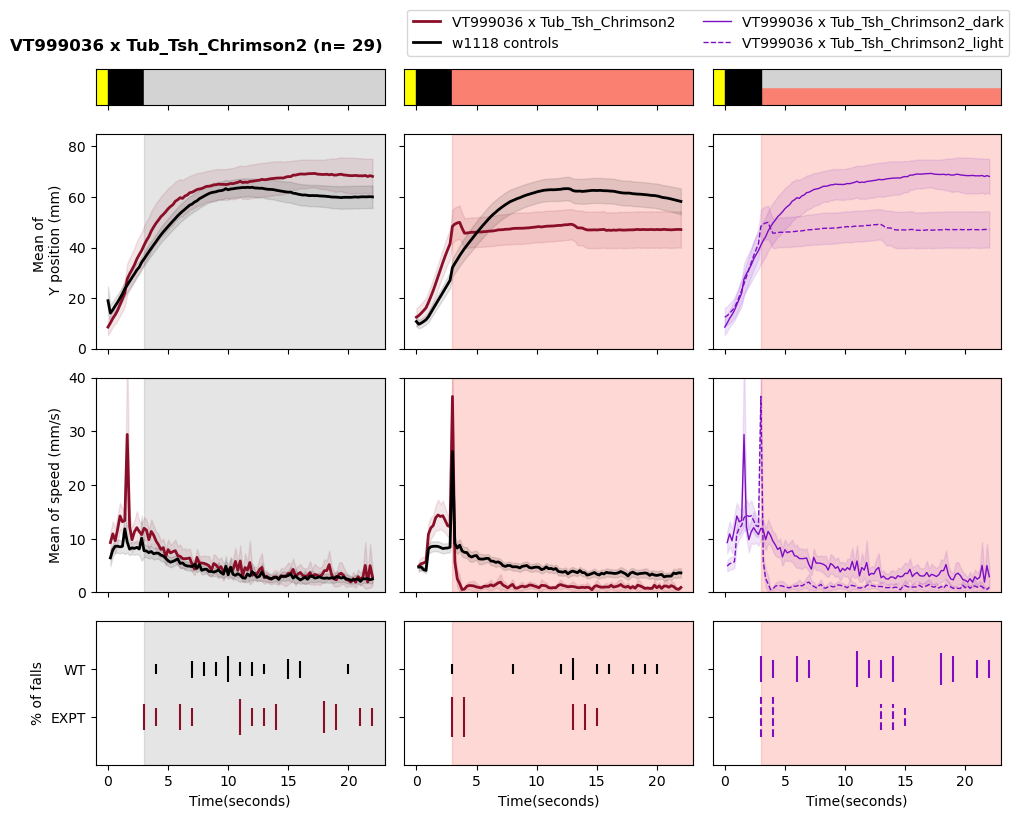

In [46]:

import matplotlib.patches as patches
figfirstplot, axs = plt.subplots(4, 3, figsize=(10, 8 ),sharex = "col", sharey='row', gridspec_kw={'height_ratios': [1,6,6,4]})


df3 = removingextraline(df_meande)
df4 = removingextraline(df_meandw)
df5 = removingextraline(df_meanse)
df6 = removingextraline(df_meansw)
driver = transgenic
nnumber = int(0.20*(len(dfexpt.columns)-2))
nnumberwt = int(0.20*(len(dfwt.columns)-2))
time = df3.loc[df3.ExperimentState == "Dark", 'Seconds']
time2 = df4.loc[df4.ExperimentState == "Dark", 'Seconds']


if "ACR" in responder:
    barcolr = "#1f9c19"
    patchcolor = "#c5e384"
    complight = "#4B2D0B"
    
if "Chrimson2" in responder:
    barcolr = "#8a0e27"
    patchcolor = "salmon"
    complight = "#7D0DC3"

#df3 = expt
#df4 = wt

#cartoon
axs[0,0].axvspan(-1,0, color = "#FFFF00", label = "_nolegend_")
axs[0,0].axvspan(0,3, color = "#000000", label = "_nolegend_")
axs[0,0].axvspan(3,23, color = "lightgray" , label = "_nolegend_")

axs[0,1].axvspan(-1,0, color = "#FFFF00" , label = "_nolegend_")
axs[0,1].axvspan(0,3, color = "#000000", label = "_nolegend_")
axs[0,1].axvspan(3,23, color = patchcolor, label = "_nolegend_")

axs[0,2].axvspan(-1,0, color = "#FFFF00" , zorder = 2, label = "_nolegend_")
axs[0,2].axvspan(0,3, color = "#000000", zorder = 2, label = "_nolegend_")
axs[0,2].axvspan(3,23, color = patchcolor, label = "_nolegend_")
axs[0,2].axhline(y=0.75, color='lightgray', linewidth =14, zorder = 1, label = "_nolegend_" )

axs[0,0].get_yaxis().set_visible(False)
axs[0,1].get_yaxis().set_visible(False)
axs[0,2].get_yaxis().set_visible(False)

#y pos    

axs[1,0].axvspan(3,23, alpha=0.1, color = "#000000", label = "_nolegend_")

axs[1,0].plot(time, df3.loc[df3.ExperimentState == "Dark", 'mean'], color = barcolr, linewidth = 2, label = "driver")
axs[1,0].fill_between(time, (df3.loc[df3.ExperimentState == "Dark", 'mean']-df3.loc[df3.ExperimentState == "Dark", 'CI']), 
                      df3.loc[df3.ExperimentState == "Dark", 'mean']+df3.loc[df3.ExperimentState == "Dark", 'CI'], color= barcolr, alpha=.1, label = "_nolegend_")
axs[1, 0].plot(time, df4.loc[df4.ExperimentState == "Dark", 'mean'], color = "#000000", linewidth =2, label = "w1118 controls")
axs[1,0].fill_between(time, (df4.loc[df4.ExperimentState == "Dark", 'mean']-df4.loc[df4.ExperimentState == "Dark", 'CI']), 
                      df4.loc[df4.ExperimentState == "Dark", 'mean']+df4.loc[df4.ExperimentState == "Dark", 'CI'], color= "#000000", alpha=.1, label = "_nolegend_")
axs[1,0].set(xlabel='Time(seconds)', ylabel='Mean of \n Y position (mm)')
axs[1,1].set(xlabel='Time(seconds)')


axs[1,1].axvspan(3,23, alpha=0.3, color = patchcolor, label = "_nolegend_")

axs[1,1].plot(time, df3.loc[df3.ExperimentState == "Full", 'mean'], color = barcolr, linewidth = 2, label = "_nolegend_")
axs[1,1].fill_between(time, (df3.loc[df3.ExperimentState == "Full", 'mean']-df3.loc[df3.ExperimentState == "Full", 'CI']), 
                      df3.loc[df3.ExperimentState == "Full", 'mean']+df3.loc[df3.ExperimentState == "Full", 'CI'], color= barcolr, alpha=.1, label = "_nolegend_")
axs[1,1].plot(time, df4.loc[df4.ExperimentState == "Full", 'mean'], color = "#000000", linewidth =2, label = "_nolegend_")
axs[1,1].fill_between(time, (df4.loc[df4.ExperimentState == "Full", 'mean']-df4.loc[df4.ExperimentState == "Full", 'CI']), 
                      df4.loc[df4.ExperimentState == "Full", 'mean']+df4.loc[df4.ExperimentState == "Full", 'CI'], color= "#000000", alpha=.1, label = "_nolegend_")

#expt comaparison

axs[1,2].axvspan(3,23, alpha=0.3, color = patchcolor, label = "_nolegend_")

axs[1,2].plot(time, df3.loc[df3.ExperimentState == "Dark", 'mean'], color = complight, linewidth = 1, label = "driver" + "_dark")
axs[1,2].fill_between(time, (df3.loc[df3.ExperimentState == "Dark", 'mean']-df3.loc[df3.ExperimentState == "Dark", 'CI']), 
                      df3.loc[df3.ExperimentState == "Dark", 'mean']+df3.loc[df3.ExperimentState == "Dark", 'CI'], color= complight, alpha=.1, label = "_nolegend_")

axs[1,2].plot(time, df3.loc[df3.ExperimentState == "Full", 'mean'], color = complight, linewidth = 1, linestyle='dashed', label = "driver" + "_light")
axs[1,2].fill_between(time, (df3.loc[df3.ExperimentState == "Full", 'mean']-df3.loc[df3.ExperimentState == "Full", 'CI']), 
                      df3.loc[df3.ExperimentState == "Full", 'mean']+df3.loc[df3.ExperimentState == "Full", 'CI'], color= complight, alpha=.1, label = "_nolegend_")


axs[1,0].set_ylim([0, 85])
axs[1,1].set_ylim([0, 85])
axs[1,2].set_ylim([0, 85])

#speed
time = df5.loc[df5.ExperimentState == "Dark", 'Seconds']
time2 = df6.loc[df6.ExperimentState == "Dark", 'Seconds']

axs[2,0].axvspan(3,23, alpha=0.1, color = "#000000")
axs[2,1].axvspan(3,23, alpha=0.3, color = patchcolor)

axs[2,0].plot(time, df5.loc[df5.ExperimentState == "Dark", 'mean'], color = barcolr, linewidth = 2, label = driver)
axs[2,0].fill_between(time, (df5.loc[df5.ExperimentState == "Dark", 'mean']-df5.loc[df5.ExperimentState == "Dark", 'CI']), 
                      df5.loc[df5.ExperimentState == "Dark", 'mean']+df5.loc[df5.ExperimentState == "Dark", 'CI'], color= barcolr, alpha=.1,  label = "_nolegend_")
axs[2,0].plot(time, df6.loc[df6.ExperimentState == "Dark", 'mean'], color = "#000000", linewidth =2, label = "w1118 controls")
axs[2,0].fill_between(time, (df6.loc[df6.ExperimentState == "Dark", 'mean']-df6.loc[df6.ExperimentState == "Dark", 'CI']), 
                      df6.loc[df6.ExperimentState == "Dark", 'mean']+df6.loc[df6.ExperimentState == "Dark", 'CI'], color= "#000000", alpha=.1, label = "_nolegend_")
axs[2,0].set(xlabel='Time(seconds)', ylabel='Mean of speed (mm/s)')
axs[2,1].set(xlabel='Time(seconds)')



axs[2,1].plot(time, df5.loc[df5.ExperimentState == "Full", 'mean'], color = barcolr, linewidth = 2)
axs[2,1].fill_between(time, (df5.loc[df5.ExperimentState == "Full", 'mean']-df5.loc[df5.ExperimentState == "Full", 'CI']), 
                      df5.loc[df5.ExperimentState == "Full", 'mean']+df5.loc[df5.ExperimentState == "Full", 'CI'], color= barcolr, alpha=.1)
axs[2,1].plot(time, df6.loc[df6.ExperimentState == "Full", 'mean'], color = "#000000", linewidth =2)
axs[2,1].fill_between(time, (df6.loc[df6.ExperimentState == "Full", 'mean']-df6.loc[df6.ExperimentState == "Full", 'CI']), 
                      df6.loc[df6.ExperimentState == "Full", 'mean']+df6.loc[df6.ExperimentState == "Full", 'CI'], color= "#000000", alpha=.1)

#expt comaparison

axs[2,2].axvspan(3,23, alpha=0.3, color = patchcolor, label = "_nolegend_")

axs[2,2].plot(time, df5.loc[df5.ExperimentState == "Dark", 'mean'], color = complight, linewidth = 1,  label = "driver" + "_dark")
axs[2,2].fill_between(time, (df5.loc[df5.ExperimentState == "Dark", 'mean']-df5.loc[df5.ExperimentState == "Dark", 'CI']), 
                      df5.loc[df5.ExperimentState == "Dark", 'mean']+df5.loc[df5.ExperimentState == "Dark", 'CI'], color= complight, alpha=.1, label = "_nolegend_")

axs[2,2].plot(time, df5.loc[df5.ExperimentState == "Full", 'mean'], color = complight, linewidth = 1, linestyle='dashed', label = "driver" + "_light")
axs[2,2].fill_between(time, (df5.loc[df5.ExperimentState == "Full", 'mean']-df5.loc[df5.ExperimentState == "Full", 'CI']), 
                      df5.loc[df5.ExperimentState == "Full", 'mean']+df5.loc[df5.ExperimentState == "Full", 'CI'], color= complight, alpha=.1, label = "_nolegend_")


axs[2,0].set_ylim([0, 40])
axs[2,1].set_ylim([0, 40])
axs[2,2].set_ylim([0, 40])

#raster
count_wtfull = counterfall(df_rrfull, nnumber, nnumberwt, "WT")
count_exptdark = counterfall(df_rrdark, nnumber, nnumberwt, "EXPT")
count_wtdark = counterfall(df_rrdark, nnumber, nnumberwt, "WT")
count_exptfull = counterfall(df_rrfull, nnumber, nnumberwt, "EXPT")

axs[3,0].axvspan(3,23, alpha=0.1, color = "#000000")
axs[3,1].axvspan(3,23, alpha=0.3, color = patchcolor)
axs[3,2].axvspan(3,23, alpha=0.3, color = patchcolor)

axs[3,0].scatter(count_exptdark['integer'], y= count_exptdark['name'], s = (50*count_exptdark['counts']), marker = "|", color = barcolr)
axs[3,0].scatter(count_wtdark['integer'], y= count_wtdark['name'], s = (50*count_wtdark['counts']),  marker = "|",color = "#000000")

axs[3,1].scatter(count_exptfull['integer'], y= count_exptfull['name'], s = (50*count_exptfull['counts']), marker = "|", color = barcolr)
axs[3,1].scatter(count_wtfull['integer'], y= count_wtfull['name'], s = (50*count_wtfull['counts']), marker = "|", color = "#000000")

count_darktemp = count_exptdark.copy()
count_darktemp["special"] = "WT"

count_fulltemp = count_exptfull.copy()
count_fulltemp["special"] = "EXPT"

axs[3,2].scatter(count_darktemp['integer'], y= count_darktemp['special'], s = (50*count_darktemp['counts']), marker = "|", color = complight)
axs[3,2].scatter(count_fulltemp['integer'], y= count_fulltemp['special'], s = (50*count_fulltemp['counts']), marker = "|", color = complight, linestyle ="dashed")


axs[3,0].set(xlabel='Time(seconds)', ylabel='% of falls')
axs[3,1].set(xlabel='Time(seconds)')
axs[3,2].set(xlabel='Time(seconds)')

axs[3,1].set_ylim([-1,2])



#Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xlim([-1,23])
    
figfirstplot.suptitle(t = driver  + " (n= " + str(nnumber) + ")", fontweight='bold', x = 0.18)

#legend
# labels = [" ", " ", "c", "b"]
# figfirstplot.legend(labels, loc='lower right', bbox_to_anchor=(1,0.95), ncol=len(labels), bbox_transform=figfirstplot.transFigure)
labels = [driver, "w1118 controls", driver +"_dark", driver + "_light"]

figfirstplot.legend(labels, loc='lower right', bbox_to_anchor=(1,0.95), ncol=2, bbox_transform=figfirstplot.transFigure)

figfirstplot.tight_layout()

figfirstplot.show()

In [47]:
count_exptdark

,integer,counts,name
0,0.0,0.000000,EXPT
1,1.0,0.000000,EXPT
2,2.0,0.000000,EXPT
3,3.0,6.896552,EXPT
4,4.0,3.448276,EXPT
5,5.0,0.000000,EXPT
6,6.0,6.896552,EXPT
7,7.0,3.448276,EXPT
8,8.0,0.000000,EXPT
9,9.0,0.000000,EXPT


In [49]:
savelocation = openPath + "images\\"
fig.write_image(savelocation + "lineplot of " + transgenic +".jpg", scale=2)